# Create Randomized List of Cities

In [41]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
# Import citipy
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

# Get City Weather Data

In [46]:
# Import requests library and API key
import requests
from config import weather_api_key

In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [48]:
# Set up basic URL with api key
url = f'http://api.openweathermap.org/data/2.5/weather?unit=Imperial&appid={weather_api_key}'

In [49]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gedo
Processing Record 2 of Set 1 | yeppoon
Processing Record 3 of Set 1 | dujuma
City not found. Skipping...
Processing Record 4 of Set 1 | palauig
Processing Record 5 of Set 1 | paka
Processing Record 6 of Set 1 | saint-georges
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | petropavlovka
Processing Record 17 of Set 1 | kuryk
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | hobart


Processing Record 37 of Set 4 | nantucket
Processing Record 38 of Set 4 | road town
Processing Record 39 of Set 4 | piotrkow trybunalski
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | henties bay
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | derzhavinsk
Processing Record 44 of Set 4 | teluknaga
Processing Record 45 of Set 4 | rovaniemi
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | bluff
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | zeya
Processing Record 50 of Set 4 | newport
Processing Record 1 of Set 5 | bukene
Processing Record 2 of Set 5 | havre-saint-pierre
Processing Record 3 of Set 5 | goderich
Processing Record 4 of Set 5 | mandalgovi
Processing Record 5 of Set 5 | cabatuan
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | bitung
Processing Record 10 of Set 5 | myitk

Processing Record 24 of Set 8 | port augusta
Processing Record 25 of Set 8 | kaduqli
Processing Record 26 of Set 8 | quba
Processing Record 27 of Set 8 | kamenka
Processing Record 28 of Set 8 | palana
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | taunsa
Processing Record 31 of Set 8 | yelizovo
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | porto franco
Processing Record 34 of Set 8 | taybad
Processing Record 35 of Set 8 | rawson
Processing Record 36 of Set 8 | pangai
Processing Record 37 of Set 8 | bereda
Processing Record 38 of Set 8 | teknaf
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | drayton valley
Processing Record 44 of Set 8 | barmer
Processing Record 45 of Set 8 | quatre cocos
Processing Record 46 of Set 8 | iqaluit
Processing Record 47 of Set 8 | kamenskoye
City not found. Skipping..

Processing Record 16 of Set 12 | napa
Processing Record 17 of Set 12 | jijiga
Processing Record 18 of Set 12 | kenora
Processing Record 19 of Set 12 | san carlos de bariloche
Processing Record 20 of Set 12 | cotonou
Processing Record 21 of Set 12 | nayoro
Processing Record 22 of Set 12 | barra da estiva
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | lusambo
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | along
Processing Record 27 of Set 12 | tarudant
City not found. Skipping...
Processing Record 28 of Set 12 | zelenogradsk
Processing Record 29 of Set 12 | campbell river
Processing Record 30 of Set 12 | rudnogorsk
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | pisco
Processing Record 33 of Set 12 | shu
Processing Record 34 of Set 12 | verkhoyansk
Processing Record 35 of Set 12 | mogzon
Processing Record 36 of Set 12 | malwan
City not found. Skipping...
Processing Record 37 of Set 12 

In [50]:
# Check number of cities' data retrieved
len(city_data)

575

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gedo,9.0167,37.4500,285.34,90,86,1.08,ET,2021-07-23 05:08:43
1,Yeppoon,-23.1333,150.7333,299.03,54,0,6.28,AU,2021-07-23 05:08:43
2,Palauig,15.4350,119.9045,299.28,95,100,4.86,PH,2021-07-23 05:08:44
3,Paka,4.6374,103.4368,305.02,59,90,3.34,MY,2021-07-23 05:08:09
4,Saint-Georges,12.0564,-61.7485,299.87,84,100,6.46,GD,2021-07-23 05:03:54
5,Yellowknife,62.4560,-114.3525,288.89,94,100,0.45,CA,2021-07-23 05:08:44
6,Rikitea,-23.1203,-134.9692,296.55,73,10,8.94,PF,2021-07-23 05:05:10
7,Saint-Philippe,-21.3585,55.7679,295.90,74,42,5.48,RE,2021-07-23 05:08:45
8,Cherskiy,68.7500,161.3000,291.22,57,97,3.68,RU,2021-07-23 05:08:45
9,Mahebourg,-20.4081,57.7000,296.07,67,18,7.09,MU,2021-07-23 05:08:46


In [52]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gedo,ET,2021-07-23 05:08:43,9.0167,37.4500,285.34,90,86,1.08
1,Yeppoon,AU,2021-07-23 05:08:43,-23.1333,150.7333,299.03,54,0,6.28
2,Palauig,PH,2021-07-23 05:08:44,15.4350,119.9045,299.28,95,100,4.86
3,Paka,MY,2021-07-23 05:08:09,4.6374,103.4368,305.02,59,90,3.34
4,Saint-Georges,GD,2021-07-23 05:03:54,12.0564,-61.7485,299.87,84,100,6.46
5,Yellowknife,CA,2021-07-23 05:08:44,62.4560,-114.3525,288.89,94,100,0.45
6,Rikitea,PF,2021-07-23 05:05:10,-23.1203,-134.9692,296.55,73,10,8.94
7,Saint-Philippe,RE,2021-07-23 05:08:45,-21.3585,55.7679,295.90,74,42,5.48
8,Cherskiy,RU,2021-07-23 05:08:45,68.7500,161.3000,291.22,57,97,3.68
9,Mahebourg,MU,2021-07-23 05:08:46,-20.4081,57.7000,296.07,67,18,7.09


In [99]:
# Convert Max Temp from Kelvin to Farenheit
# Define function for conersion
def K_to_F (tempK):
    tempF = (tempK-273.15)*(9/5) +32
    return tempF

# Update column in data file
city_data_df["Max Temp"] = K_to_F(city_data_df["Max Temp"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gedo,ET,2021-07-23 05:08:43,9.0167,37.4500,53.942,90,86,1.08
1,Yeppoon,AU,2021-07-23 05:08:43,-23.1333,150.7333,78.584,54,0,6.28
2,Palauig,PH,2021-07-23 05:08:44,15.4350,119.9045,79.034,95,100,4.86
3,Paka,MY,2021-07-23 05:08:09,4.6374,103.4368,89.366,59,90,3.34
4,Saint-Georges,GD,2021-07-23 05:03:54,12.0564,-61.7485,80.096,84,100,6.46
5,Yellowknife,CA,2021-07-23 05:08:44,62.4560,-114.3525,60.332,94,100,0.45
6,Rikitea,PF,2021-07-23 05:05:10,-23.1203,-134.9692,74.120,73,10,8.94
7,Saint-Philippe,RE,2021-07-23 05:08:45,-21.3585,55.7679,72.950,74,42,5.48
8,Cherskiy,RU,2021-07-23 05:08:45,68.7500,161.3000,64.526,57,97,3.68
9,Mahebourg,MU,2021-07-23 05:08:46,-20.4081,57.7000,73.256,67,18,7.09


In [100]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Latitudes

In [101]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## vs. Temperature

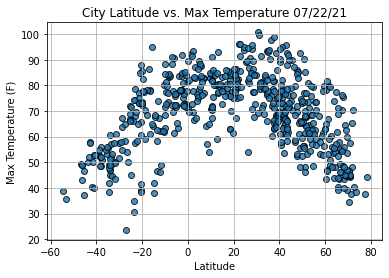

In [102]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## vs. Humidity

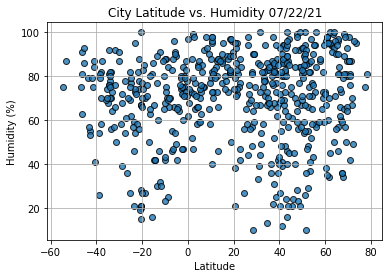

In [103]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## vs. Cloudiness

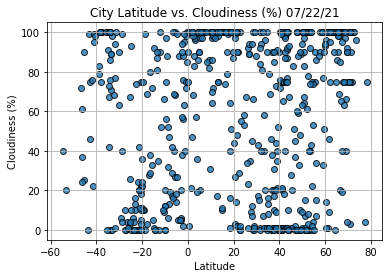

In [104]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## vs. Wind Speed

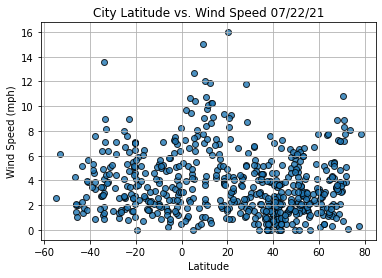

In [105]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Finding Correlations

In [106]:
# Import linregress
from scipy.stats import linregress

In [119]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)
    print(f'Slope: {slope:.1f}, Intercept: {intercept:.1f}, r-value: {r_value:.3f}, p-value: {p_value:.3f}, Std.Error: {std_error:.3f}')

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [120]:
# Get Northern Hemisphere data - check output
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gedo,ET,2021-07-23 05:08:43,9.0167,37.4500,53.942,90,86,1.08
2,Palauig,PH,2021-07-23 05:08:44,15.4350,119.9045,79.034,95,100,4.86
3,Paka,MY,2021-07-23 05:08:09,4.6374,103.4368,89.366,59,90,3.34
4,Saint-Georges,GD,2021-07-23 05:03:54,12.0564,-61.7485,80.096,84,100,6.46
5,Yellowknife,CA,2021-07-23 05:08:44,62.4560,-114.3525,60.332,94,100,0.45


In [121]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [122]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gedo,ET,2021-07-23 05:08:43,9.0167,37.4500,53.942,90,86,1.08
2,Palauig,PH,2021-07-23 05:08:44,15.4350,119.9045,79.034,95,100,4.86
3,Paka,MY,2021-07-23 05:08:09,4.6374,103.4368,89.366,59,90,3.34
4,Saint-Georges,GD,2021-07-23 05:03:54,12.0564,-61.7485,80.096,84,100,6.46
5,Yellowknife,CA,2021-07-23 05:08:44,62.4560,-114.3525,60.332,94,100,0.45


In [123]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yeppoon,AU,2021-07-23 05:08:43,-23.1333,150.7333,78.584,54,0,6.28
6,Rikitea,PF,2021-07-23 05:05:10,-23.1203,-134.9692,74.120,73,10,8.94
7,Saint-Philippe,RE,2021-07-23 05:08:45,-21.3585,55.7679,72.950,74,42,5.48
9,Mahebourg,MU,2021-07-23 05:08:46,-20.4081,57.7000,73.256,67,18,7.09
10,Bengkulu,ID,2021-07-23 05:08:46,-3.8004,102.2655,83.642,64,88,2.43


## Between Latitude & Max Temp

Slope: -0.4, Intercept: 88.4, r-value: -0.619, p-value: 0.000, Std.Error: 0.028


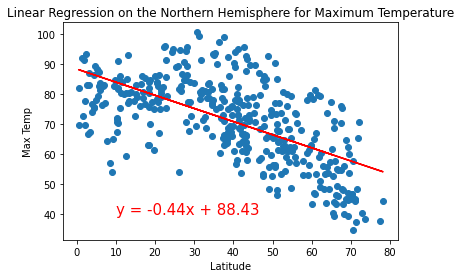

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

Slope: 0.8, Intercept: 80.7, r-value: 0.710, p-value: 0.000, Std.Error: 0.059


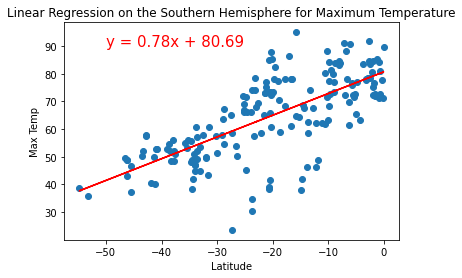

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))

## Between Latitude & Humidity 

Slope: -0.1, Intercept: 74.1, r-value: -0.051, p-value: 0.315, Std.Error: 0.052


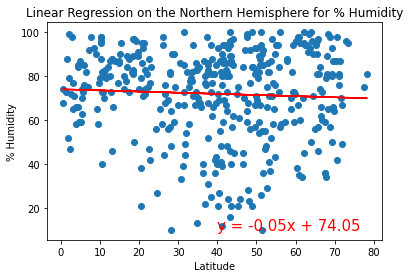

In [126]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

Slope: -0.1, Intercept: 64.7, r-value: -0.069, p-value: 0.359, Std.Error: 0.107


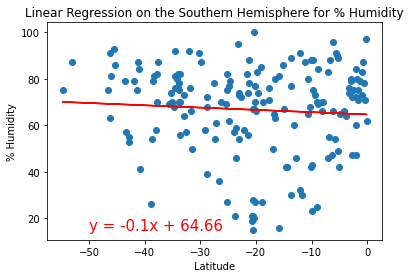

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,15))

## Between Latitude & Cloudiness

Slope: -0.1, Intercept: 63.6, r-value: -0.033, p-value: 0.515, Std.Error: 0.100


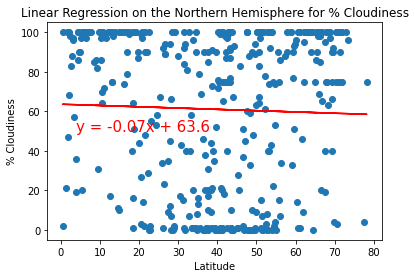

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (4,50))

Slope: -0.3, Intercept: 40.7, r-value: -0.111, p-value: 0.138, Std.Error: 0.207


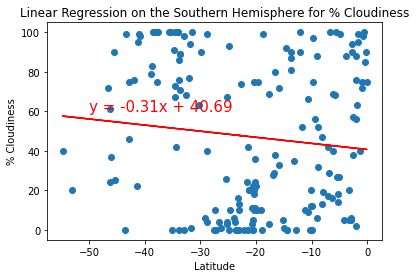

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

## Between Latitude & Wind Speed

Slope: -0.0, Intercept: 4.8, r-value: -0.221, p-value: 0.000, Std.Error: 0.007


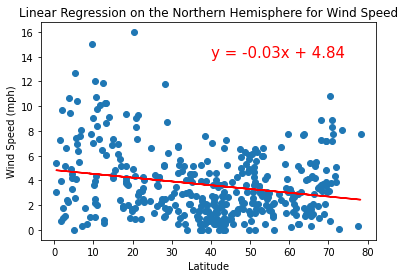

In [137]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,14))

Slope: -0.0, Intercept: 3.6, r-value: -0.026, p-value: 0.728, Std.Error: 0.012


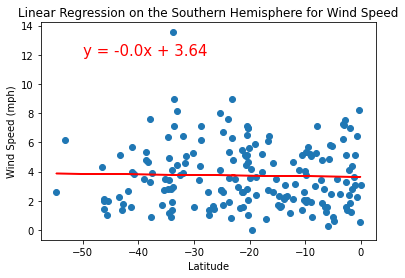

In [140]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,12))